##**Sugeno FIS**
This fuzzy inference system was proposed by Takagi, Sugeno, and Kang to develop a systematic approach for generating fuzzy rules from a given input-output dataset. A typical fuzzy rule in a first-order Sugeno fuzzy model has the form:

**IF x is A and y is B THEN z = f(x, y)** where

**A** and **B** are fuzzy sets in the antecedent
**z = f(x, y)** is a crisp function in the consequent.

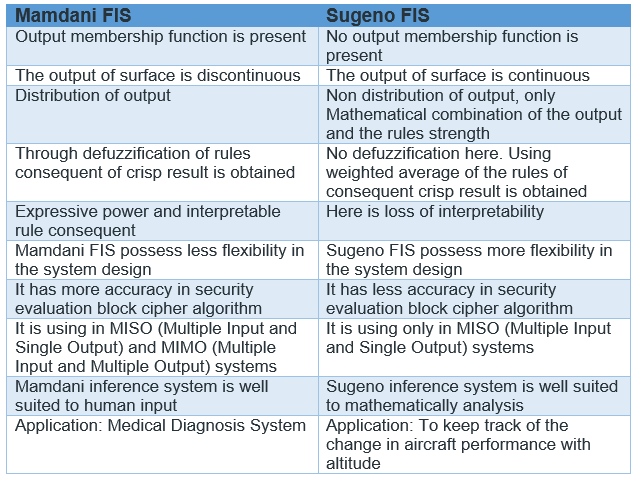

## **Sepsis** is the body’s extreme response to an infection. It is a life-threatening medical emergency.  Sepsis happens when an infection you already have triggers a chain reaction throughout your body.  Infections that lead to sepsis most often start in the lung, urinary tract, skin, or gastrointestinal tract. Without timely treatment, sepsis can rapidly lead to tissue damage, organ failure, and death.

#When a patient enters the intensive care unit (ICU) with symptoms of sepsis, clinicians must diagnose quickly and start treatment within an hour of admission. Clinical decision support systems aim at helping clinicians with these decisions by processing patient data, such as blood levels and symptoms, and giving suggestionsfor diagnosis or treatment plans.

In [ ]:
pip install simpful

In [ ]:
from simpful import *

In [ ]:
# Create a fuzzy system object
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



#The fuzzy sets are defined by using sigmoidal and Gaussian functions. Since these functions have 𝕌 = ℝ as domain, it is not possible to automatically estimate the limits of the universe of discourse for plotting the membership functions with the draw() method.

#Therefore, the user has to explicitly set the universe of discourse by specifying the argument universe_of_discourse. Please note that this (explicitly limited) universe of discourse is only used to plot the membership functions: the system still supports input values outside thisrangewhen inferring the output.

In [ ]:
# Define fuzzy sets for the variable PaO2
P1 = FuzzySet(function=Sigmoid_MF(c=40, a=0.1), term="low")
P2 = FuzzySet(function=InvSigmoid_MF(c=40, a=0.1), term="high")
LV1 = LinguisticVariable([P1,P2], concept="PaO2 level in blood", universe_of_discourse=[0,80])
FS.add_linguistic_variable("PaO2", LV1)

#The variable “base excess” is created by first specifying the fuzzy set describing physiological values(using the preimplemented Gaussian_MF function). This is the only fuzzy set for this linguistic variable, meaning that the fuzzy set for the abnormal values for the base excess is not explicitly modeled, but corresponds to the complement of the fuzzy set for normal values (note the NOT operator in second fuzzy rule). 

#The same results could be achieved by modeling the set of non-normal values explicitly, either using the InvGaussian_MF function, or splitting the universe of discourse in a low, medium, and high fuzzy set, and later connecting the low and high fuzzy set in the fuzzy rule through an OR operator. 

#However, using the NOT operator simplifies the FIS and preservesits high levels of interpretability. The output crisp values“low_probability” and “high_probability,” referring to the probability that the patient is suffering from sepsis, are defined.

In [ ]:
# Define fuzzy sets for the variable base excess
B1 = FuzzySet(function=Gaussian_MF(mu=0,sigma=1.25), term="normal")
LV2 = LinguisticVariable([B1], concept="Base excess of the blood", universe_of_discourse=[-10,10])
FS.add_linguistic_variable("BaseExcess", LV2)

In [ ]:
# Define fuzzy sets for the variable trombocytes
T1 = FuzzySet(function=Sigmoid_MF(c=50, a=0.75), term="low")
T2 = FuzzySet(function=InvSigmoid_MF(c=50, a=0.75), term="high")
LV3 = LinguisticVariable([T1,T2], concept="Trombocytes in blood", universe_of_discourse=[0,100])
FS.add_linguistic_variable("Trombocytes", LV3)

In [ ]:
# Define fuzzy sets for the variable creatinine
C1 = FuzzySet(function=Sigmoid_MF(c=300, a=0.2), term="low")
C2 = FuzzySet(function=InvSigmoid_MF(c=300, a=0.1), term="high")
LV4 = LinguisticVariable([C1,C2], concept="Creatinine in blood", universe_of_discourse=[0,600])
FS.add_linguistic_variable("Creatinine", LV4)

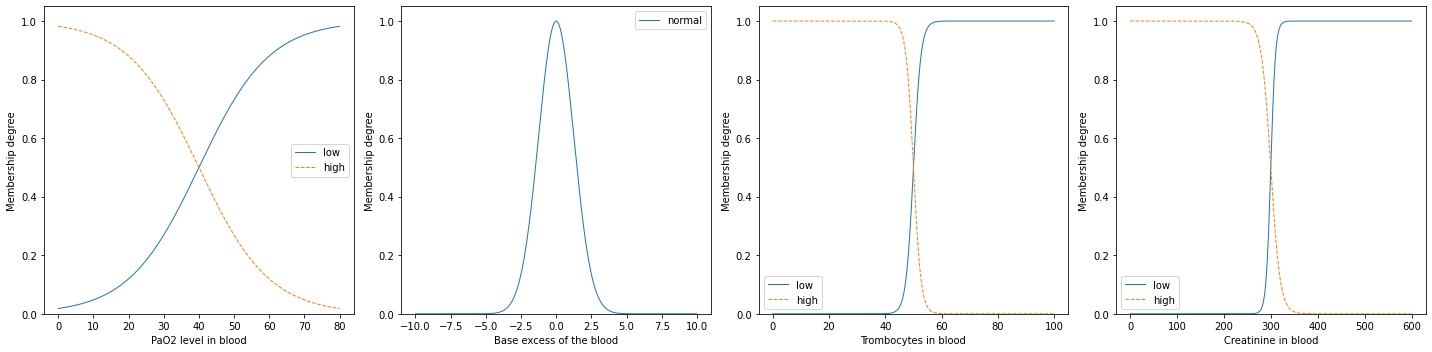

In [ ]:
# Plot all linguistic variables and save them in a output file
FS.produce_figure(outputfile='lvs.pdf')

In [ ]:
# Define the consequents
FS.set_crisp_output_value("low_probability", 1)
#FS.set_output_function("medium_probability", "BaseExcess+Trombocytes+2")
FS.set_crisp_output_value("high_probability", 99)

 * Detected Sugeno model type


In [ ]:
# Define the fuzzy rules
RULE1 = "IF (PaO2 IS low) AND (Trombocytes IS high) AND (Creatinine IS high) AND (BaseExcess IS normal) THEN (Sepsis IS low_probability)"
RULE2 = "IF (PaO2 IS high) AND (Trombocytes IS low) AND (Creatinine IS low) AND (NOT(BaseExcess IS normal)) THEN (Sepsis IS high_probability)"

In [ ]:
# Add fuzzy rules to the fuzzy reasoner object
FS.add_rules([RULE1, RULE2])

In [ ]:
# Set antecedent values
FS.set_variable("PaO2", 50)
FS.set_variable("BaseExcess", -1.5)
FS.set_variable("Trombocytes", 50)
FS.set_variable("Creatinine", 320)

## The following cell provides example input values to the model, and fuzzy inference is performed to obtain the probability that the patient is suffering from sepsis which, in this example, is equal to 68.90%.

In [ ]:
# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["Sepsis"]))

{'Sepsis': 68.90324203600152}
